
# Template Matching with OpenCV 

This script demonstrates how to perform **template matching** in images using OpenCV’s `cv2.matchTemplate` function with the **TM\_CCOEFF\_NORMED** method.
It finds the best match of a smaller image (the **template**) inside a larger image (the **source**).

---

## How It Works

1. **Load images**

   * The source image (`alphabet_grid.png`) is the larger image containing multiple characters.
   * The template image (`Bb.png`) is the smaller pattern we want to find.
   * Both are loaded in **grayscale** for efficiency.

2. **Template Matching**

   * Uses OpenCV’s `cv2.matchTemplate` with the method `cv2.TM_CCOEFF_NORMED`.
   * This computes a **normalized cross-correlation coefficient** at each location, making the method **robust to illumination changes**.

   Formula:

   $$
   R(x, y) = \frac{\sum (T' \cdot I')}{\sqrt{\sum (T'^2) \cdot \sum (I'^2)}}
   $$

   where `T'` and `I'` are the mean-centered template and image patch.

3. **Find Best Match**

   * `cv2.minMaxLoc` is used to extract the maximum correlation score and its location.
   * The coordinates of the top-left corner of the best match are recorded.
   * A rectangle is drawn around the detected region.

4. **Visualization**

   * The result is displayed using Matplotlib.
   * Left: Original grayscale source image.
   * Right: Source image with a **red rectangle** highlighting the detected template.

---


## Output

* **Correlation score**: A value between `-1` and `1`. Closer to `1.0` means a stronger match.
* **Location**: Coordinates `(x, y)` of the **top-left corner** of the detected template.
* **Visualization**: A red rectangle around the matched template in the source image.

---

## Notes

* `cv2.TM_CCOEFF_NORMED` is recommended because it normalizes both the template and the search region, making results **independent of global brightness/contrast changes**.
* Other matching methods in OpenCV include:

  * `cv2.TM_SQDIFF: Squared difference`
  * `cv2.TM_SQDIFF_NORMED: Normalized squared difference`
  * `cv2.TM_CCORR: Cross-correlation.`
  * `cv2.TM_CCORR_NORMED: Normalized cross-correlation.`
  * `cv2.TM_CCOEFF: Correlation coefficient`
  * `cv2.TM_CCOEFF_NORMED: Normalized correlation coefficient`



* Depending on your use case, try different methods for robustness.


### The Core Concept

Imagine you have a large image (the "source" or "haystack") and a smaller image (the "template" or "needle"). Template matching works by sliding the template over every possible location in the source image and calculating a numerical value that represents "how similar" the template is to that particular region. The result of this process is a "result matrix" where each pixel contains this similarity score.

The method you choose defines the *mathematical formula* used to calculate that score.

---

### Category 1: Sum of Square Differences (Matching by Minimization)

These methods calculate the difference in pixel values. A **perfect match will give a value of 0**. For these methods, you look for the **minimum** value in the result matrix.

#### 1. `cv2.TM_SQDIFF` (Squared Difference)
*   **How it works:** It calculates the sum of the squared differences between the template pixels and the source image pixels.
    *   Formula (simplified): `Result(x, y) = Σ [Source(x+i, y+j) - Template(i, j)]²`
*   **Interpretation:** **0 = perfect match**. Larger positive values indicate worse matches.
*   **Best for:** Finding an exact, pixel-perfect match. Very sensitive to changes in lighting or contrast.

#### 2. `cv2.TM_SQDIFF_NORMED` (Normalized Squared Difference)
*   **How it works:** This is a normalized version of `TM_SQDIFF`. The normalization scales the result between 0 and 1, making it less sensitive to the overall brightness of the images.
    *   Formula (simplified): `Result(x, y) = Σ [Source(x+i, y+j) - Template(i, j)]² / sqrt(Σ Source² * Σ Template²)`
*   **Interpretation:** **0 = perfect match**. 1 is the worst possible match.
*   **Best for:** The same as `TM_SQDIFF`, but more robust when the lighting conditions between the template and source image aren't identical.

---

### Category 2: Cross-Correlation (Matching by Maximization)

These methods calculate a dot product (a measure of similarity). A **higher value indicates a better match**. For these methods, you look for the **maximum** value in the result matrix.

#### 3. `cv2.TM_CCORR` (Cross-Correlation)
*   **How it works:** It calculates the sum of the products of the template and source image pixels.
    *   Formula (simplified): `Result(x, y) = Σ [Source(x+i, y+j) * Template(i, j)]`
*   **Interpretation:** A **large positive number = good match**. A low or negative number = bad match.
*   **Drawback:** If a region of the source image is simply *brighter* than other regions, it will yield a high score even if the pattern doesn't match, because bright pixels have high values which produce large products. This makes it generally unreliable.

#### 4. `cv2.TM_CCORR_NORMED` (Normalized Cross-Correlation)
*   **How it works:** This is the normalized version of `TM_CCORR`. The normalization fixes the brightness problem.
    *   Formula (simplified): `Result(x, y) = Σ [Source(x+i, y+j) * Template(i, j)] / sqrt(Σ Source² * Σ Template²)`
*   **Interpretation:** The score is scaled between **0 and 1**. **1 = perfect match**. 0 = no match.
*   **Best for:** A good general-purpose method that is invariant to linear changes in illumination (e.g., if the template and source have the same pattern but one is brighter, it will still match well).

---

### Category 3: Correlation Coefficient (The Most Robust)

These are the most advanced and generally most useful methods. They are similar to cross-correlation but subtract the mean intensity first, making them invariant to both offset and scale in lighting conditions.

#### 5. `cv2.TM_CCOEFF` (Correlation Coefficient)
*   **How it works:** It calculates the cross-correlation of the *mean-adjusted* images.
    1.  Subtract the average value from the template (`T - T_mean`).
    2.  Subtract the average value from the current source window (`S - S_mean`).
    3.  Calculate the cross-correlation of these two adjusted matrices.
*   **Interpretation:** A positive value indicates a positive correlation, a negative value indicates a negative correlation (e.g., a photo and its negative), and 0 indicates no correlation. You look for the **maximum** value.
*   **Benefit:** It is not fooled by uniformly bright areas anymore.

#### 6. `cv2.TM_CCOEFF_NORMED` (Normalized Correlation Coefficient)
*   **How it works:** This is the normalized version of `TM_CCOEFF`, scaling the result between -1 and 1.
    *   Formula: This is effectively the **Pearson correlation coefficient** applied to the image matrices.
*   **Interpretation:**
    *   **1 = perfect positive correlation** (the best possible match).
    *   **0 = no correlation**.
    *   **-1 = perfect negative correlation** (an inverse match, like a photo negative).
*   **Best for:** **This is often the best method to use.** It is highly robust to differences in lighting and contrast. If a pattern is present, even if it's much darker or brighter in the source image, this method will usually find it.

---

### Summary Table

| Method | Perfect Match Value | Search For | Robust to Lighting Changes? | Use Case |
| :--- | :---: | :---: | :---: | :--- |
| **`TM_SQDIFF`** | 0 | **Minimum** | No | Exact, pixel-perfect matches |
| **`TM_SQDIFF_NORMED`** | 0 | **Minimum** | Somewhat | Exact matches with varying brightness |
| **`TM_CCORR`** | Large Number | Maximum | No | Not recommended (use normalized versions) |
| **`TM_CCORR_NORMED`** | 1 | Maximum | Yes (Linear) | Good general-purpose matching |
| **`TM_CCOEFF`** | Large Number | Maximum | Yes (Offset) | Better than CCORR, but use normalized |
| **`TM_CCOEFF_NORMED`** | **1** | **Maximum** | **Yes (Best)** | **Best overall choice for most tasks** |


---



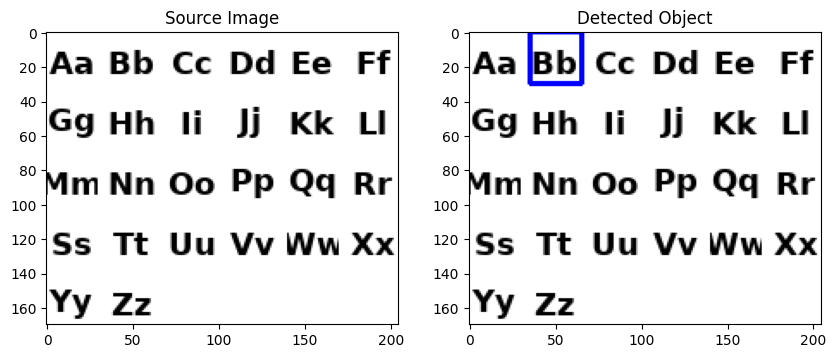

Correlation score of the best match: 1.0000
Location of the best match (top-left corner): (35, 0)


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the source image and the template image
# Make sure the image paths are correct
source_image = cv2.imread('alphabet_grid.png', 0)  # Load as grayscale
template = cv2.imread('Bb.png', 0)     # Load as grayscale

# Get the dimensions of the template
w, h = template.shape[::-1]

# Perform template matching using normalized cross-correlation (TM_CCOEFF_NORMED)
# This method is generally recommended as it's less sensitive to changes in illumination
result = cv2.matchTemplate(source_image, template, cv2.TM_CCOEFF_NORMED)

# Find the location of the best match
# The minMaxLoc function finds the minimum and maximum values and their locations
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Get the top-left corner of the best match
top_left = max_loc

# Calculate the bottom-right corner of the best match
bottom_right = (top_left[0] + w, top_left[1] + h)

# Draw a rectangle around the matched region on the source image
# Create a color version of the source image to draw the rectangle in red
source_image_rgb = cv2.cvtColor(source_image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(source_image_rgb, top_left, bottom_right, (0, 0, 255), 2)  # Red rectangle with thickness 2

# Display the result
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(source_image, cmap='gray')
plt.title('Source Image')
plt.subplot(1, 2, 2)
plt.imshow(source_image_rgb)
plt.title('Detected Object')
plt.show()

# Print the correlation score and location
print(f"Correlation score of the best match: {max_val:.4f}")
print(f"Location of the best match (top-left corner): {top_left}")


## Template Matching (TM\_CCOEFF\_NORMED) from Scratch

This implementation reproduces OpenCV’s `cv2.TM_CCOEFF_NORMED` template matching method using only NumPy.
It computes the similarity between a **template image** and a **source image** by sliding the template over the source and calculating the **normalized cross-correlation coefficient** at each location.

### Function: `tm_ccoef_normed`

```python
def tm_ccoef_normed(source: np.ndarray, template: np.ndarray) -> tuple[np.ndarray, float, tuple]:
    """
    Template Matching (TM_CCOEFF_NORMED) from scratch.
    Returns: result_map, best_score, best_location
    """
```

### Parameters

* **source** (`np.ndarray`): The larger grayscale image where we want to find the template.
* **template** (`np.ndarray`): The smaller grayscale image (pattern) we want to locate in the source.

### Returns

* **result\_map** (`np.ndarray`): A 2D similarity map of shape `(H - h + 1, W - w + 1)`, where each value represents the similarity score at that sliding window position.
* **best\_score** (`float`): The maximum normalized correlation score (range: `-1.0 to 1.0`). A value close to `1.0` indicates a strong match.
* **best\_location** (`tuple`): The coordinates `(y, x)` of the best match inside the source image.

### How It Works

1. **Template normalization**

   * The template is mean-centered (`T = template - template.mean()`).
   * Its denominator `T_den` is the Euclidean norm (`√Σ(T²)`), ensuring scale invariance.

2. **Sliding window across the source**

   * For every `(y, x)` position, extract a patch of the source with the same size as the template.
   * Mean-center the patch (`P = patch - patch.mean()`).
   * Compute its norm `P_den`.

3. **Normalized correlation coefficient**

   * The similarity score is computed as:

     $$
     R(y, x) = \frac{\sum (T \cdot P)}{\sqrt{\sum T^2} \cdot \sqrt{\sum P^2}}
     $$

   * This ensures the result is independent of brightness/contrast changes.

4. **Result aggregation**

   * Store the score in the `result` map.
   * Track the maximum score and its location.



### Notes

* The output `best_loc` corresponds to the **top-left corner** of the detected template in the source.
* This method is robust against changes in brightness/contrast because it normalizes both the template and the source patches.
* For efficiency, OpenCV’s `cv2.matchTemplate(..., cv2.TM_CCOEFF_NORMED)` is recommended, but this function is useful for **learning and debugging**.

---


Best correlation score: 1.0000
Predicted Grid: Row 1, Column 2
Ground Truth : Row 1, Column 2
Precision: 1.0000, Recall: 1.0000, Accuracy: 1.0000


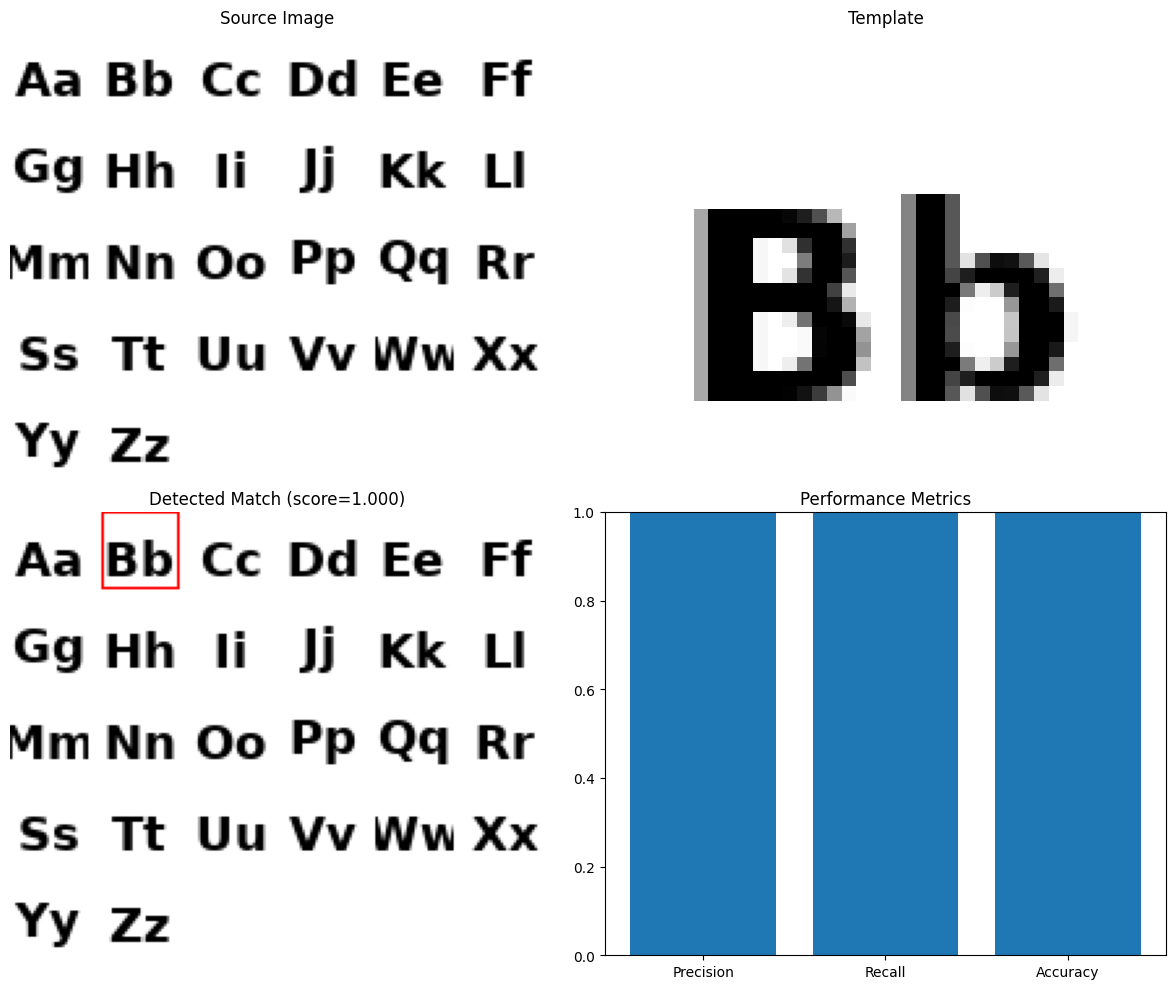

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread


def load_image_grayscale(path: str) -> np.ndarray:
    """Load an image and convert to grayscale float32."""
    img = imread(path)
    if img.ndim == 3:
        img = img[..., :3] @ [0.299, 0.587, 0.114]  # RGB → grayscale
    return img.astype(np.float32)


def tm_ccoef_normed(source: np.ndarray, template: np.ndarray) -> tuple[np.ndarray, float, tuple]:
    """
    Template Matching (TM_CCOEFF_NORMED) from scratch.
    Returns: result_map, best_score, best_location
    """
    H, W = source.shape
    h, w = template.shape

    # Normalize template
    T = template - template.mean()
    T_den = np.sqrt(np.sum(T**2))

    result = np.zeros((H - h + 1, W - w + 1), dtype=np.float32)

    # Sliding window
    for y in range(result.shape[0]):
        for x in range(result.shape[1]):
            patch = source[y:y+h, x:x+w]
            P = patch - patch.mean()
            P_den = np.sqrt(np.sum(P**2))

            if P_den > 1e-6:
                result[y, x] = np.sum(T * P) / (T_den * P_den)
            else:
                result[y, x] = 0.0

    max_val = np.max(result)
    max_loc = np.unravel_index(np.argmax(result), result.shape)  # (y, x)
    return result, max_val, max_loc


def grid_position(max_loc: tuple, H: int, W: int, grid_rows=6, grid_cols=6) -> tuple[int, int]:
    """Convert match location to grid row/col (1-based indexing)."""
    segment_rows = H // grid_rows
    segment_cols = W // grid_cols
    row = max_loc[0] // segment_rows + 1
    col = max_loc[1] // segment_cols + 1
    return row, col


def evaluate_prediction(pred_row, pred_col, gt_row, gt_col, grid_rows=6, grid_cols=6):
    """Compute Precision, Recall, Accuracy for single prediction."""
    TP = int(pred_row == gt_row and pred_col == gt_col)
    FP = 1 - TP
    FN = 0  # single prediction, so FN not applicable here
    TN = grid_rows * grid_cols - TP - FP

    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return precision, recall, accuracy


def visualize(source, template, top_left, bottom_right, precision, recall, accuracy, max_val):
    """Show images and performance metrics."""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Source
    axes[0, 0].imshow(source, cmap="gray")
    axes[0, 0].set_title("Source Image")
    axes[0, 0].axis("off")

    # Template
    axes[0, 1].imshow(template, cmap="gray")
    axes[0, 1].set_title("Template")
    axes[0, 1].axis("off")

    # Source with detected rectangle
    source_rgb = np.stack([source, source, source], axis=-1)
    source_rgb /= source_rgb.max()
    y1, x1 = top_left[1], top_left[0]
    y2, x2 = bottom_right[1], bottom_right[0]
    source_rgb[y1:y2, [x1, x2-1]] = [1, 0, 0]
    source_rgb[[y1, y2-1], x1:x2] = [1, 0, 0]

    axes[1, 0].imshow(source_rgb)
    axes[1, 0].set_title(f"Detected Match (score={max_val:.3f})")
    axes[1, 0].axis("off")

    # Metrics
    axes[1, 1].bar(["Precision", "Recall", "Accuracy"], [precision, recall, accuracy])
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].set_title("Performance Metrics")

    plt.tight_layout()
    plt.show()


def main():
    source_path = "alphabet_grid.png"
    template_path = "Bb.png"
    gt_path = "ground_truth.txt"

    # Load images
    source = load_image_grayscale(source_path)
    template = load_image_grayscale(template_path)

    # Template matching
    result, max_val, max_loc = tm_ccoef_normed(source, template)

    # Bounding box
    h, w = template.shape
    top_left = (max_loc[1], max_loc[0])
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Grid position
    pred_row, pred_col = grid_position(max_loc, *source.shape)


    # Ground truth lookup
    try:
        ground_truth = pd.read_csv(gt_path, delimiter=",")
        fname = template_path.split("/")[-1]
        gt_row = int(ground_truth[ground_truth["Filename"] == fname]["Row"].values[0])
        gt_col = int(ground_truth[ground_truth["Filename"] == fname]["Column"].values[0])
    except Exception:
        print("Warning: No ground truth found")
        gt_row, gt_col = -1, -1



    precision, recall, accuracy = evaluate_prediction(pred_row, pred_col, gt_row, gt_col)

    # Print summary
    print(f"Best correlation score: {max_val:.4f}")
    print(f"Predicted Grid: Row {pred_row}, Column {pred_col}")
    print(f"Ground Truth : Row {gt_row}, Column {gt_col}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")

    # Visualization
    visualize(source, template, top_left, bottom_right, precision, recall, accuracy, max_val)


if __name__ == "__main__":
    main()
